## Grouping students based on their performance using K Means Clustering

In [932]:
# import all the required libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Setting a seed to ensure consistent results
random.seed(42)

In [933]:
# obtain the raw csv 
data = "../assets/data/student_marksheet.csv"
marksheet_df = pd.read_csv(data)

In [934]:
print(marksheet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       250 non-null    int64 
 1   Name     250 non-null    object
 2   Gender   250 non-null    object
 3   Age      250 non-null    int64 
 4   Section  250 non-null    object
 5   Science  250 non-null    int64 
 6   English  250 non-null    int64 
 7   History  250 non-null    int64 
 8   Maths    250 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 17.7+ KB
None


In [935]:
print(marksheet_df.head())

   id     Name  Gender  Age Section  Science  English  History  Maths
0   1  Bronnie  Female   13       C       21       81       62     49
1   2   Lemmie    Male   15       B       29       41       17     40
2   3    Danya  Female   14       C       12       87       16     96
3   4    Denna  Female   14       B       15       53       82     33
4   5  Jocelin    Male   14       A       43        6        3     21


In [936]:
# Identifying categorical features
print(marksheet_df["Gender"].unique())
print(marksheet_df["Section"].unique())
print(marksheet_df["Age"].unique())

['Female' 'Male']
['C' 'B' 'A']
[13 15 14]


In [937]:
# Dealing with categorical data
marksheet_df["Gender"].replace({"Female": 0, "Male": 1}, inplace=True)
marksheet_df["Section"].replace({"A": 0, "B": 1, "C": 2}, inplace=True)
marksheet_df["Age"].replace({"13": 0, "14": 1, "15": 2}, inplace=True)

In [938]:
print(marksheet_df.shape)
print(marksheet_df.head())

(250, 9)
   id     Name  Gender  Age  Section  Science  English  History  Maths
0   1  Bronnie       0   13        2       21       81       62     49
1   2   Lemmie       1   15        1       29       41       17     40
2   3    Danya       0   14        2       12       87       16     96
3   4    Denna       0   14        1       15       53       82     33
4   5  Jocelin       1   14        0       43        6        3     21


In [939]:
# In this scenario, we aim to create groups of students according to their performance.
K = 50

In [940]:
# Initialize the centroids randomly
centroids = set()

while(len(centroids) != K):
    random_index = random.randint(0, len(marksheet_df)-1)
    z = tuple(marksheet_df.iloc[random_index, -7:])
    centroids.add(z)

# Convert the set to a list
centroids = list(centroids)

# print("Initial Centroids: ")
# for i in range(K):
#     print(centroids[i])

In [941]:
def get_distance(x, df, i):

    # Handling Gender, Section and Age features
    dist = 0
    if (df.loc[i, "Gender"] != x[0]):
        dist += 5
    if (df.loc[i, "Section"] != x[2]):
        dist += 5
    dist += 2.5*(np.abs(df.loc[i, "Age"] - x[1]))

    # Handling Marks
    dist += 2*(np.abs(df.loc[i, "Science"] - x[3]))
    dist += 2*(np.abs(df.loc[i, "English"] - x[4]))
    dist += 2*(np.abs(df.loc[i, "History"] - x[5]))
    dist += 2*(np.abs(df.loc[i, "Maths"] - x[6]))

    return dist

In [942]:
def get_dissimilarity(cluster, centroids, marksheet_df):
    sum = 0
    for i in range(len(cluster)): 
        for j in range(len(cluster[i])):
            sum += get_distance(np.array(centroids[i]), marksheet_df, cluster[i][j])

    return sum

In [943]:
def fit(K, marksheet_df, centroids, num_iterations=100):
    # Initialize clusters
    clusters = [[] for _ in range(K)]
    total_dissimilarity = []

    for m in range(num_iterations):
        # Reset clusters
        clusters = [[] for _ in range(K)]
        
        # Assign each data point to the closest centroid
        for i in range(len(marksheet_df)):
            min_dist = float("inf")
            idx = 0
            for j in range(len(centroids)):
                dist = get_distance(np.array(centroids[j]), marksheet_df, i)
                # dist = np.sum(np.abs(centroids[j] - vec))
                if dist < min_dist:
                    min_dist = dist
                    idx = j
            clusters[idx].append(i)  # Append index of data point
        
        # Update centroids
        for i in range(len(clusters)):
            if clusters[i]:
                cluster_points = marksheet_df.iloc[clusters[i], -7:]
                centroids[i] = np.mean(cluster_points, axis=0)
        
        # Get dissimilarity
        dissimilarity = get_dissimilarity(clusters, centroids, marksheet_df)

        if (m % 1 == 0):
            print(f'Completed iteration {m}: {dissimilarity}')

        # Check for convergence
        if (m > 0 and dissimilarity == total_dissimilarity[-1]):
            print(f'Algorithm Converged at {m}: {dissimilarity}')
            break
        else:
            total_dissimilarity.append(dissimilarity)

    return clusters, centroids, total_dissimilarity

In [944]:
clusters, centroids, total_dissimilarity = fit(K, marksheet_df, centroids)

Completed iteration 0: 18195.81471306471
Completed iteration 1: 16982.947150072152
Completed iteration 2: 16753.084920634923
Completed iteration 3: 16753.084920634923
Algorithm Converged at 3: 16753.084920634923


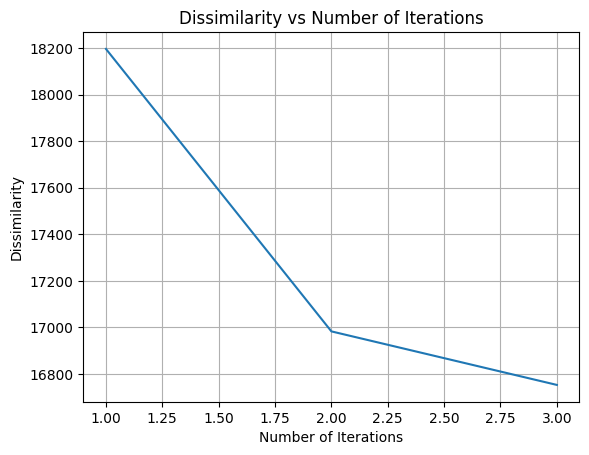

In [945]:
# Plotting missclassifications against the number of iterations
plt.plot(range(1, len(total_dissimilarity) + 1), total_dissimilarity)
plt.xlabel('Number of Iterations')
plt.ylabel('Dissimilarity')
plt.title('Dissimilarity vs Number of Iterations')
plt.grid(True)
plt.show()

In [946]:
# Print all groups
# for i in range(len(clusters)):
#     print(f'Cluster {i+1}: ')
#     for j in range(len(clusters[i])):
#         vec = marksheet_df.iloc[clusters[i][j]]
#         print(f'{vec[1]}: {vec[2]} {vec[3]} {vec[4]} {vec[5]} {vec[6]} {vec[7]}')
#     print("")

# Print a specific group
group = 0
for i in range(len(clusters[group])):
        vec = marksheet_df.iloc[clusters[group][i]]
        print(f'{vec[1]}: {vec[2]} {vec[3]} {vec[4]} {vec[5]} {vec[6]} {vec[7]} {vec[8]}')

Cherie: 1 15 2 32 31 89 30
Vaughn: 1 14 2 11 30 83 17
Ermina: 0 15 1 38 17 76 26
Vivyan: 1 14 0 28 30 80 33
